In [4]:
!pip install memory_profiler

In [1]:
from utils import mnist_reader
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from util import Utils
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as npa little 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_train, y_train = shuffle(X_train, y_train)

In [3]:
best_rf_model = Utils.find_best_rf_parameters(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

All Results:
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy'} with accuracy: 0.8793333333333333
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini'} with accuracy: 0.8739166666666667
{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'} with accuracy: 0.8557333333333332
{'n_estimators': 10, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini'} with accuracy: 0.8458000000000001
{'n_estimators': 10, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'} with accuracy: 0.8276500000000001
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'} with accuracy: 0.8803333333333333
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'} with accuracy: 0.8784833333333334
{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'} with accur

In [4]:
rf_model, rf_accuracy, rf_f_score = Utils.accuracy_measure_rf(X_train, y_train, 
                          X_test, y_test, 
                          n_estimators = 100, criterion = 'entropy', max_depth = 100, max_features = 'sqrt')

--- 83.50198698043823 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    48    516.8 MiB    516.8 MiB           1       @profile
    49                                             def accuracy_measure_rf(X_train, y_train, X_test, y_test, n_estimators=50, criterion='entropy', max_depth=10, max_features='log2'):
    50    516.8 MiB      0.0 MiB           1           import time
    51    516.8 MiB      0.0 MiB           1           from sklearn.ensemble import RandomForestClassifier
    52    516.8 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    53                                             
    54    516.8 MiB      0.0 MiB           1           start_time = time.time()
    55    516.8 MiB      0.0 MiB           1           rf_model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_fea

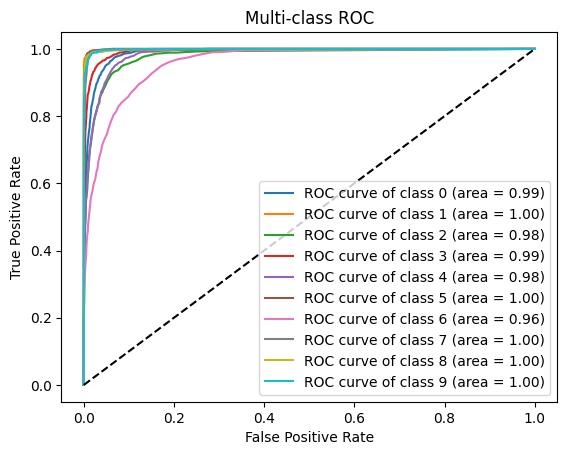

In [13]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

rf_probs = rf_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i]) # For Random Forest
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import classification_report
rf_report = classification_report(y_test, rf_model.predict(X_test), digits = 5)
print(rf_report)


              precision    recall  f1-score   support

           0    0.82314   0.86100   0.84164      1000
           1    0.99483   0.96300   0.97866      1000
           2    0.76081   0.79200   0.77609      1000
           3    0.87308   0.90800   0.89020      1000
           4    0.76173   0.81200   0.78606      1000
           5    0.97851   0.95600   0.96712      1000
           6    0.72503   0.58800   0.64936      1000
           7    0.92802   0.95400   0.94083      1000
           8    0.95122   0.97500   0.96296      1000
           9    0.94990   0.94800   0.94895      1000

    accuracy                        0.87570     10000
   macro avg    0.87463   0.87570   0.87419     10000
weighted avg    0.87463   0.87570   0.87419     10000



In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

In [7]:
best_xgb_model = Utils.find_best_xgb_parameters(X_train, y_train, X_val, y_val)

[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   2.4s
[CV] END criterion=gini, max_depth=50, max_features=log2, n_estimators=50; total time=  10.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=50; total time=  28.2s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=50; total time=  28.7s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=  11.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=50; total time=  29.1s
[CV] END criterion=gini, max_depth=100, max_features=log2, n_estimators=10; total time=   2.1s
[CV] END criterion=gini, max_depth=100, max_features=log2, n_estimators=10; total time=   2.1s
[CV] END criterion=gini, max_depth=100, max_features=log2, n_estimators=10; total time=   2.1s
[CV] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100; total time=  22.1s
[CV] END criterion=entropy, max_depth=5

In [14]:
xgb_model, xgb_accuracy, xgb_f_score = Utils.accuracy_measure_xgb(X_train, y_train, 
                          X_test, y_test,
                           n_estimators = 100, learning_rate = 0.1, max_depth = 50, subsample = 0.8, colsample_bytree = 1)

--- 442.72244906425476 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    86    730.0 MiB    730.0 MiB           1       @profile
    87                                             def accuracy_measure_xgb(X_train, y_train, X_test, y_test, n_estimators=50, learning_rate=0.1, max_depth=10, subsample=0.5, colsample_bytree=0.5):
    88    730.0 MiB      0.0 MiB           1           import time
    89    730.0 MiB      0.0 MiB           1           import xgboost as xgb
    90    730.0 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    91                                             
    92    730.0 MiB      0.0 MiB           1           start_time = time.time()
    93    730.0 MiB      0.0 MiB           1           xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsamp

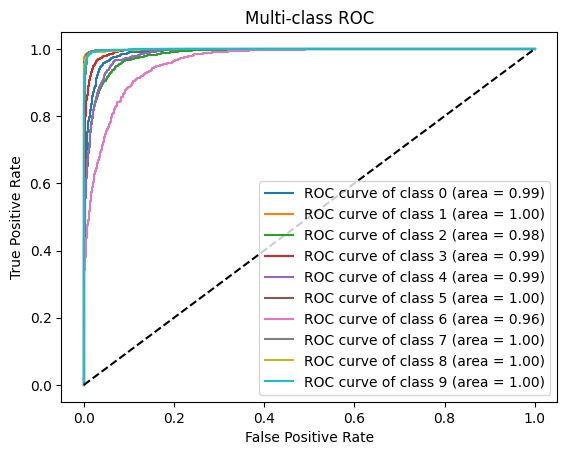

In [16]:
xgb_probs = xgb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
xgb_report = classification_report(y_test, xgb_model.predict(X_test), digits = 5)
print(xgb_report)

              precision    recall  f1-score   support

           0    0.82190   0.86300   0.84195      1000
           1    0.99182   0.97000   0.98079      1000
           2    0.78351   0.83600   0.80890      1000
           3    0.88878   0.91100   0.89975      1000
           4    0.79806   0.82200   0.80985      1000
           5    0.98061   0.96100   0.97071      1000
           6    0.73897   0.62000   0.67428      1000
           7    0.93720   0.97000   0.95332      1000
           8    0.96329   0.97100   0.96713      1000
           9    0.96559   0.95400   0.95976      1000

    accuracy                        0.88780     10000
   macro avg    0.88697   0.88780   0.88664     10000
weighted avg    0.88697   0.88780   0.88664     10000



In [22]:
print(xgb_accuracy)

0.8878


In [23]:
print(rf_accuracy)

0.8757
